# K-Means Clusters for The Quraan

In [16]:
import csv
import re
import pandas as pd
import numpy as np

In [ ]:
def quran_md_to_csv(md_file_path, csv_file_path):
    results = []
    current_verse = None
    current_tafseer_lines = []

    with open(md_file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.rstrip()
            # Check if line starts with '#' followed by an integer (verse number)
            match = re.match(r"^#\s*(\d+)$", line)
            if match:
                # If we have a current verse, store it before moving on
                if current_verse is not None and current_tafseer_lines:
                    results.append([current_verse, "\n".join(current_tafseer_lines)])
                # Start a new verse
                current_verse = match.group(1)
                current_tafseer_lines = []
            else:
                # Accumulate tafseer lines
                if line.strip():
                    current_tafseer_lines.append(line)

    # Store the last collected verse
    if current_verse is not None and current_tafseer_lines:
        results.append([current_verse, "\n".join(current_tafseer_lines)])

    # Write to CSV
    with open(csv_file_path, "w", encoding="utf-8", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Verse", "Tafseer"])
        writer.writerows(results)


In [ ]:
quran_md_to_csv('ar-al-saddi-qurancom.md', 'saadi.csv')

In [ ]:
df = pd.read_csv('saadi.csv')
df.head()

Verse                                            Tafseer
0      1  { بِسْمِ اللَّهِ } أي: أبتدئ بكل اسم لله تعالى...
1      2  { الْحَمْدُ لِلَّهِ } \[هو\] الثناء على الله ب...
2      3  ومن قيامه تعالى بعباده ورحمته بهم أن نزل على ر...
3      4  { مَالِكِ يَوْمِ الدِّينِ } المالك: هو من اتصف...
4      5  وقوله { إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِي...

In [ ]:
df.shape

(6236, 2)

In [ ]:
tafseer_df = pd.read_csv('Tafseer.csv', encoding='latin-1')
tafseer_df.head()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 45, saw 5


In [ ]:
import pandas as pd

# Load JSON file
json_file = "Tafseer.json"  # Change to your filename
df = pd.read_json(json_file)

# Select four specific columns (adjust column names based on your JSON structure)
columns_to_keep = ["tafseer", "sura", "ayah", "nass"]  # Replace with actual names
df = df[columns_to_keep]

# Save as CSV
csv_file = "Tafseer.csv"
df.to_csv(csv_file, index=False, encoding='utf-8-sig')  # Ensures Arabic text is preserved

print(f"CSV file '{csv_file}' saved successfully!")


CSV file 'Tafseer.csv' saved successfully!


In [ ]:
df = pd.read_csv('Tafseer.csv')
df.head()

tafseer  sura  ayah                                               nass
0        1     1     1  القول في تأويل الاستعاذة\nتأويل قوله : ( أعوذ ...
1        1     1     2  الْحَمْدُ لِلَّهِ :\nقال أبو جعفر: ومعنى (الْح...
2        1     1     3  الرَّحْمَٰنِ الرَّحِيمِ (3)\nالقول في تأويل قو...
3        1     1     4  مَالِكِ يَوْمِ الدِّينِ (4)\nالقول في تأويل قو...
4        1     1     5  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ (5)\n...

In [ ]:
# Filter rows where column2 == 3 and store in a new DataFrame
df_saadi = df[df["tafseer"] == 3].copy()

# Save the filtered DataFrame to a new CSV file (optional)
df_saadi.to_csv("saadi_tafseer_final.csv", index=False, encoding="utf-8-sig")

print("Filtered DataFrame created successfully!")


Filtered DataFrame created successfully!


In [ ]:
df_saadi.head()

tafseer  sura  ayah                                               nass
12472        3     1     1  { بِسْمِ اللَّهِ } أي: أبتدئ بكل اسم لله تعالى...
12473        3     1     2  { الْحَمْدُ لِلَّهِ } [هو] الثناء على الله بصف...
12474        3     1     3  {الرَّحْمَنِ الرَّحِيمِ} اسمان دالان على أنه ت...
12475        3     1     4  { مَالِكِ يَوْمِ الدِّينِ } المالك: هو من اتصف...
12476        3     1     5  وقوله { إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِي...

from matplotlib import pyplot as plt
_df_0['ayah'].plot(kind='hist', bins=20, title='ayah')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('nass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tafseer']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tafseer'}, axis=1)
              .sort_values('tafseer', ascending=True))
  xs = counted['tafseer']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('tafseer', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nass')):
  _plot_series(series, series_name, i)
  fig.legend(title='nass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tafseer')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sura']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sura'}, axis=1)
              .sort_values('sura', ascending=True))
  xs = counted['sura']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('sura', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nass')):
  _plot_series(series, series_name, i)
  fig.legend(title='nass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sura')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ayah']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ayah'}, axis=1)
              .sort_values('ayah', ascending=True))
  xs = counted['ayah']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('ayah', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nass')):
  _plot_series(series, series_name, i)
  fig.legend(title='nass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ayah')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['ayah'].plot(kind='line', figsize=(8, 4), title='ayah')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['nass'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='ayah', y='nass', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df_saadi["nass"].isna().any()


False

In [ ]:
df_saadi = df[df["tafseer"] == 3].copy()  # Filter rows where tafseer == 3
df_saadi.reset_index(drop=True, inplace=True)  # Reset index


In [ ]:
rows_with_nans = df_saadi[df_saadi["nass"].isna()]
print(rows_with_nans)

      tafseer  sura  ayah nass
553         3     4    61  NaN
977         3     7    24  NaN
1964        3    16    64  NaN
2330        3    19    81  NaN
2331        3    19    82  NaN
2592        3    21   110  NaN
2612        3    22    18  NaN
2932        3    26     1  NaN
3114        3    26   183  NaN
3324        3    28    73  NaN
3357        3    29    18  NaN
3422        3    30    14  NaN
3682        3    35    23  NaN
3867        3    37    80  NaN
3869        3    37    82  NaN
3883        3    37    96  NaN
3918        3    37   131  NaN
3963        3    37   176  NaN
3966        3    37   179  NaN
4338        3    43    14  NaN
4425        3    44    12  NaN
4427        3    44    14  NaN
4457        3    44    44  NaN
4460        3    44    47  NaN
4461        3    44    48  NaN
4477        3    45     5  NaN
4480        3    45     8  NaN
4481        3    45     9  NaN
4672        3    50    43  NaN
4679        3    51     5  NaN
4680        3    51     6  NaN
4795    

In [ ]:
rows_with_nans.shape

(50, 4)

In [ ]:
for idx in df_saadi[df_saadi["nass"].isna()].index:
    sura = df_saadi.at[idx, "sura"]
    ayah = df_saadi.at[idx, "ayah"]
    df_saadi.at[idx, "nass"] = input(f"Enter value for row {idx}, sura {sura}, ayah {ayah}: ")


Enter value for row 553, sura 4, ayah 61: وإذا نُصح هؤلاء، وقيل لهم: تعالوا إلى ما أنزل الله، وإلى الرسول محمد صلى الله عليه وسلم، وهديه، أبصَرْتَ الذين يظهرون الإيمان ويبطنون الكفر، يعرضون عنك إعراضًا.
Enter value for row 977, sura 7, ayah 24: قال تعالى مخاطبًا آدم وحواء وإبليس: اهبطوا من السماء إلى الأرض، وسيكون بعضكم لبعض عدوًا، ولكم في الأرض مكان تستقرون فيه، وتتمتعون إلى انقضاء آجالكم.
Enter value for row 1964, sura 16, ayah 64: وما أنزلنا عليك القرآن -أيها الرسول- إلا لتوضح للناس ما اختلفوا فيه من الدين والأحكام؛ لتقوم الحجة عليهم ببيانك ورشدًا ورحمة لقوم يؤمنون.
Enter value for row 2330, sura 19, ayah 81: واتخذ المشركون آلهة يعبدونها من دون الله؛ لتنصرهم، ويعتزوا بها.
Enter value for row 2331, sura 19, ayah 82: ليس الأمر كما يزعمون، لن تكون لهم الآلهة عزًا، بل ستكفر هذه الآلهة في الآخرة بعبادتهم لها، وتكون عليهم أعوانًا في خصومتهم وتكذيبهم بخلاف ما ظنوه فيها.
Enter value for row 2592, sura 21, ayah 110: إن الله يعلم ما تجهرون به من أقوالكم، وما تكتمونه في سرائركم، وسيحاسبكم عليه

In [ ]:
df_saadi.head()

tafseer  sura  ayah                                               nass
0        3     1     1  { بِسْمِ اللَّهِ } أي: أبتدئ بكل اسم لله تعالى...
1        3     1     2  { الْحَمْدُ لِلَّهِ } [هو] الثناء على الله بصف...
2        3     1     3  {الرَّحْمَنِ الرَّحِيمِ} اسمان دالان على أنه ت...
3        3     1     4  { مَالِكِ يَوْمِ الدِّينِ } المالك: هو من اتصف...
4        3     1     5  وقوله { إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِي...

In [ ]:
df_saadi.to_csv("saadi_tafseer_final_cleaned.csv", index=False, encoding="utf-8-sig")


In [ ]:
df_saadi.drop(columns=["tafseer"], inplace=True)

In [ ]:
print(df_saadi)

      sura  ayah                                               nass
0        1     1  { بِسْمِ اللَّهِ } أي: أبتدئ بكل اسم لله تعالى...
1        1     2  { الْحَمْدُ لِلَّهِ } [هو] الثناء على الله بصف...
2        1     3  {الرَّحْمَنِ الرَّحِيمِ} اسمان دالان على أنه ت...
3        1     4  { مَالِكِ يَوْمِ الدِّينِ } المالك: هو من اتصف...
4        1     5  وقوله { إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِي...
...    ...   ...                                                ...
6231   114     2  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6232   114     3  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6233   114     4  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6234   114     5  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6235   114     6  وهذه السورة مشتملة على الاستعاذة برب الناس وما...

[6236 rows x 3 columns]


In [ ]:
!pip install camel-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 836.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
from camel_tools.utils.dediac import dediac_ar
import re

def remove_diacritics(text):
    return dediac_ar(text)

def remove_non_arabic(text):
    return re.sub(r'[^ء-ي\s]', '', text)  # Keep only Arabic letters and spaces to feed ML model


In [ ]:
df_saadi['nass'] = df_saadi['nass'].apply(remove_diacritics)  # Remove diacritics using Camel Tools
df_saadi['nass'] = df_saadi['nass'].apply(remove_non_arabic)  # Remove non-Arabic characters

In [ ]:
df_saadi.head()

sura  ayah                                               nass
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...

In [ ]:
print(df_saadi)

      sura  ayah                                               nass
0        1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...
1        1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...
2        1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...
3        1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...
4        1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...
...    ...   ...                                                ...
6231   114     2  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6232   114     3  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6233   114     4  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6234   114     5  وهذه السورة مشتملة على الاستعاذة برب الناس وما...
6235   114     6  وهذه السورة مشتملة على الاستعاذة برب الناس وما...

[6236 rows x 3 columns]


In [ ]:
df = df_saadi.copy()

In [ ]:
!camel_data -i morphology-db-msa-r13

The following packages will be installed: 'morphology-db-msa-r13'
Extracting package 'morphology-db-msa-r13': 100% 40.5M/40.5M [00:00<00:00, 287MB/s]


In [ ]:
df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...  
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...  
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...  
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...  
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...

In [ ]:
df.to_csv("normalized_tafseer.csv", index=False, encoding="utf-8-sig")


In [14]:
df = pd.read_csv("normalized_tafseer.csv")

In [15]:
df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...  
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...  
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...  
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...  
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...

In [6]:
!pip install -U farasapy

In [9]:
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer

In [15]:
sample = "بسم الله أي أبتدئ بكل اسم لله تعالى لأن لفظ"

In [11]:
stemmer = FarasaStemmer()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [12:02<00:00, 334kiB/s]


In [24]:
stemmer.stem(sample)

'بسم الله أي أبتدئ كل اسم الله تعالى أن لفظ'

In [20]:
def farasa_stemmer(text):
    return stemmer.stem(text)

In [25]:
df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...  
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...  
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...  
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...  
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...

In [6]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [5]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available!")
    device = torch.device("cuda")
else:
    print("GPU is not available. Using CPU.")
    device = torch.device("cpu")

GPU is available!


In [6]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 44.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [7]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [60]:
# Define the multiline string
STOP_WORDS = """
،
ـ
ء
ءَ
آ
أ
ا
ا?
االا
االتى
آب
أبٌ
ابتدأ
أبدا
أبريل
أبو
ابين
اتخذ
اثر
اثنا
اثنان
اثني
اثنين
أجل
اجل
أجمع
أحد
احد
إحدى
أخٌ
أخبر
أخذ
آخر
اخرى
اخلولق
أخو
إذ
إذا
إذاً
اذا
آذار
إذما
إذن
أربع
أربعاء
أربعة
اربعة
أربعمائة
أربعمئة
اربعون
اربعين
ارتدّ
أرى
إزاء
استحال
أسكن
أصبح
اصبح
أصلا
آض
إضافي
أضحى
اضحى
اطار
أطعم
اعادة
أعطى
أعلم
اعلنت
أغسطس
أُفٍّ
أفٍّ
اف
أفريل
أفعل به
أقبل
أكتوبر
أكثر
اكثر
اكد
آل
أل
ألا
إلا
إلّا
الا
الاخيرة
الألاء
الألى
الآن
الان
الاول
الاولى
التي
التى
الثاني
الثانية
الحالي
الذاتي
الذي
الذى
الذين
السابق
ألف
الف
ألفى
اللاتي
اللتان
اللتيا
اللتين
اللذان
اللذين
اللواتي
الماضي
المقبل
الوقت
إلي
إلى
الي
الى
إلَيْكَ
إليكَ
إليكم
إليكما
إليكنّ
اليه
اليها
اليوم
أم
أما
أمّا
إما
إمّا
اما
أمام
امام
أمامك
أمامكَ
أمد
أمس
امس
أمسى
امسى
آمينَ
أن
أنًّ
إن
إنَّ
ان
أنا
آناء
أنبأ
انبرى
أنت
أنتِ
انت
أنتم
أنتما
أنتن
أنشأ
آنفا
أنفسكم
أنفسنا
أنفسهم
انقلب
أنه
إنه
انه
أنها
إنها
انها
أنّى
آه
آهٍ
آهِ
آهاً
أهلا
أو
او
أوت
أوشك
أول
اول
أولاء
أولالك
أولئك
أوّهْ
أي
أيّ
أى
إى
اي
اى
ا?ى
أيا
أيار
ايار
إياك
إياكم
إياكما
إياكن
ايام
ّأيّان
أيّان
إيانا
إياه
إياها
إياهم
إياهما
إياهن
إياي
أيضا
ايضا
أيلول
أين
إيهٍ
ب
باء
بات
باسم
بأن
بإن
بان
بخٍ
بد
بدلا
برس
بَسْ
بسّ
بسبب
بشكل
بضع
بطآن
بعد
بعدا
بعض
بعيدا
بغتة
بل
بَلْهَ
بلى
بن
به
بها
بهذا
بؤسا
بئس
بيد
بين
بينما
ة
ت
تاء
تارة
تاسع
تانِ
تانِك
تبدّل
تجاه
تحت
تحت'
تحوّل
تخذ
ترك
تسع
تسعة
تسعمائة
تسعمئة
تسعون
تسعين
تشرين
تعسا
تعلَّم
تفعلان
تفعلون
تفعلين
تكون
تلقاء
تلك
تم
تموز
تِه
تِي
تَيْنِ
تينك
ث
ثاء
ثالث
ثامن
ثان
ثاني
ثانية
ثلاث
ثلاثاء
ثلاثة
ثلاثمائة
ثلاثمئة
ثلاثون
ثلاثين
ثم
ثمَّ
ثمّ
ثمان
ثمانمئة
ثمانون
ثماني
ثمانية
ثمانين
ثمّة
ثمنمئة
ج
جانفي
جدا
جعل
جلل
جمعة
جميع
جنيه
جوان
جويلية
جير
جيم
ح
حاء
حادي
حار
حاشا
حاليا
حاي
حبذا
حبيب
حتى
حجا
حدَث
حَذارِ
حرى
حزيران
حسب
حقا
حمٌ
حمدا
حمو
حوالى
حول
حيَّ
حيث
حيثما
حين
خ
خاء
خارج
خاصة
خال
خامس
خبَّر
خلا
خلافا
خلال
خلف
خمس
خمسة
خمسمائة
خمسمئة
خمسون
خمسين
خميس
د
دال
درهم
درى
دواليك
دولار
دون
دونك
ديسمبر
ديك
دينار
ذ
ذا
ذات
ذاك
ذال
ذانِ
ذانك
ذلك
ذِه
ذهب
ذو
ذِي
ذيت
ذَيْنِ
ذينك
ر
راء
رابع
راح
رأى
رُبَّ
رجع
رزق
رويدك
ريال
ريث
ز
زاي
زعم
زود
زيارة
س
ساء
سابع
سادس
سبت
سبتمبر
سبحان
سبع
سبعة
سبعمائة
سبعمئة
سبعون
سبعين
ست
ستة
ستكون
ستمائة
ستمئة
ستون
ستين
سحقا
سرا
سرعان
سقى
سمعا
سنة
سنتيم
سنوات
سوف
سوى
سين
ش
شباط
شبه
شَتَّانَ
شتانَ
شخصا
شرع
شمال
شيكل
شين
ص
صاد
صار
صباح
صباحا
صبر
صبرا
صدقا
صراحة
صفر
صهٍ
صهْ
ض
ضاد
ضحوة
ضد
ضمن
ط
طاء
طاق
طالما
طرا
طفق
طَق
ظ
ظاء
ظل
ظلّ
ظنَّ
ع
عاد
عاشر
عام
عاما
عامة
عجبا
عدَّ
عدا
عدة
عدد
عَدَسْ
عدم
عسى
عشر
عشرة
عشرون
عشرين
عل
علًّ
علق
علم
علي
على
عليك
عليه
عليها
عن
عند
عندما
عنه
عنها
عوض
عيانا
عين
غ
غادر
غالبا
غدا
غداة
غير
غين
ف
فاء
فأن
فإن
فان
فانه
فبراير
فرادى
فضلا
فعل
فقد
فقط
فكان
فلان
فلس
فما
فهو
فهي
فهى
فو
فوق
في
فى
فيفري
فيه
فيها
ق
قاطبة
قاف
قال
قام
قبل
قد
قرش
قطّ
قلما
قليل
قوة
ك
كاد
كاف
كأن
كأنّ
كان
كانت
كانون
كأيّ
كأيّن
كثيرا
كِخ
كذا
كذلك
كرب
كسا
كل
كلا
كلَّا
كلتا
كلم
كلّما
كم
كما
كن
كى
كيت
كيف
كيفما
ل
لا
لات
لازال
لاسيما
لا سيما
لام
لأن
لايزال
لبيك
لدن
لدي
لدى
لديه
لذلك
لعل
لعلَّ
لعمر
لقاء
لك
لكن
لكنَّ
لكنه
للامم
لم
لما
لمّا
لماذا
لن
لنا
له
لها
لهذا
لهم
لو
لوكالة
لولا
لوما
لي
ليت
ليرة
ليس
ليسب
م
ما
ما أفعله
ماانفك
ما انفك
مابرح
ما برح
مادام
ماذا
مارس
مازال
مافتئ
ماي
مائة
مايزال
مايو
متى
مثل
مذ
مرة
مرّة
مساء
مع
معاذ
معظم
معه
معها
مقابل
مكانَك
مكانكم
مكانكما
مكانكنّ
مليار
مليم
مليون
مما
من
منذ
منه
منها
مه
مهما
مئة
مئتان
ميم
ن
نَّ
نا
نبَّا
نحن
نحو
نَخْ
نعم
نفس
نفسك
نفسه
نفسها
نفسي
نهاية
نوفمبر
نون
نيسان
نيف
ه
ها
هاء
هَاتانِ
هَاتِه
هَاتِي
هَاتَيْنِ
هاكَ
هبّ
هَجْ
هذا
هَذا
هَذانِ
هذه
هَذِه
هَذِي
هَذَيْنِ
هكذا
هل
هلّا
هللة
هلم
هم
هما
همزة
هن
هنا
هناك
هنالك
هو
هؤلاء
هَؤلاء
هي
هى
هيا
هيّا
هيهات
هَيْهات
ؤ
و
و6
وا
وأبو
واحد
واضاف
واضافت
واكد
والتي
والذي
وأن
وإن
وان
واهاً
واو
واوضح
وبين
وثي
وجد
وجود
وراءَك
ورد
وُشْكَانَ
وعلى
وفي
وقال
وقالت
وقد
وقف
وكان
وكانت
وكل
ولا
ولايزال
ولكن
ولم
ولن
وله
وليس
وما
ومع
ومن
وهب
وهذا
وهو
وهي
وهى
وَيْ
ي
ى
ئ
ياء
يجري
يفعلان
يفعلون
يكون
يلي
يمكن
يمين
ين
يناير
ينبغي
يوان
يورو
يوليو
يوم
يونيو
"""

stop_words = set(text.split("\n")) - {""}

print(stop_words)


{'المقبل', 'جلل', 'هبّ', 'إيهٍ', 'اللتان', 'بشكل', 'بل', 'أنتِ', 'إياها', 'إى', 'أي', 'بسّ', 'اخرى', 'اضحى', 'تموز', 'بئس', 'صار', 'ماي', 'ثاني', 'خلال', 'مافتئ', 'عاما', 'يناير', 'نحن', 'سنتيم', 'طالما', 'ثمانين', 'ءَ', 'حَذارِ', 'له', 'خاء', 'نيف', 'ابين', 'وما', 'أخو', 'فكان', 'هيّا', 'أهلا', 'ثامن', 'تشرين', 'جمعة', 'لديه', 'لعلَّ', 'لن', 'إلَيْكَ', 'إياهن', 'علًّ', 'بان', 'دال', 'أيّان', 'امام', 'هي', 'اي', 'تسعون', 'أسكن', 'يفعلان', 'أنتم', 'هاكَ', 'إيانا', 'ذِي', 'اخلولق', 'خميس', 'عدَّ', 'إنه', 'أ', 'إليكم', 'سوف', 'والتي', 'للامم', 'أيضا', 'ما انفك', 'وهى', 'ز', 'خارج', 'عين', 'خ', 'سنوات', 'وله', 'أخبر', 'خامس', 'واوضح', 'آهٍ', 'أوشك', 'سبت', 'شين', 'سبعمائة', 'غالبا', 'ح', 'ثلاثاء', 'أفريل', 'إضافي', 'دولار', 'ذاك', 'منذ', 'هل', 'يونيو', 'ايام', 'كيت', 'هَاتَيْنِ', 'عل', 'خمسة', 'فلس', 'منه', 'لبيك', 'لازال', 'يلي', 'الوقت', 'أربعة', 'ديك', 'لايزال', 'مادام', 'اللاتي', 'فوق', 'الى', 'ظنَّ', 'وقالت', 'قام', 'أنا', 'تم', 'او', 'ذانِ', 'شرع', 'اثني', 'ترك', 'اكثر', 'هذه', 'دينا

**Reference:**
Alrefaie, M. T. (2019). *Arabic Stop Words*. Retrieved from [here](https://github.com/mohataher/arabic-stop-words/tree/master).


In [4]:

print(f"CUDA is available: {torch.cuda.is_available()}")

print(f"CUDA version: {torch.version.cuda}")

print(f"GPU device: {torch.cuda.get_device_name(0)}")

CUDA is available: True
CUDA version: 12.4
GPU device: Tesla T4


In [9]:
import stanza
import pandas as pd
import torch
from collections import Counter

if torch.cuda.is_available():
    print("GPU is available!")
    device = torch.device("cuda")
else:
    print("GPU is not available. Using CPU.")
    device = torch.device("cpu")

GPU is available!


In [10]:
nlp = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma', use_gpu=True)

if hasattr(nlp.processors['pos'], 'model'):
    device = next(nlp.processors['pos'].model.parameters()).device
    print(f"Pipeline is using GPU: {device.type == 'cuda'}")
else:
    print("Could not verify GPU usage. Pipeline may not be using GPU.")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Could not verify GPU usage. Pipeline may not be using GPU.


In [11]:
nlp = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma', use_gpu=True)

print("Pipeline initialized with GPU support.")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Pipeline initialized with GPU support.


In [40]:
text = "المهندسون يعملون في الشركة"

doc = nlp(sample)

lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
print("Original:", text)
print("Stemmed (Lemmatized):", " ".join(lemmas))


Original: المهندسون يعملون في الشركة
Stemmed (Lemmatized): بسم الله أَي اِبتَدَئ بِ كُلّ اِسم لِ اَللّٰه تَعَالَى لِأَنَّ لفظ


In [12]:
def process_text(text):
    """
    Process Arabic text using Stanza NLP pipeline.
    Returns a list of dictionaries containing tokens, lemmas, and POS tags.
    """
    doc = nlp(text)
    processed_data = []
    for sentence in doc.sentences:
        for word in sentence.words:
            processed_data.append({
                'text': word.text,       # Original token
                'lemma': word.lemma,    # Lemma
                'pos': word.pos,        # Part of Speech
                'xpos': word.xpos        # Detailed POS
            })
    return processed_data

In [22]:
df['stanza_processed'] = df['nass'].apply(process_text)

df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  \
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...   
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...   
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...   
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...   
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...   

                                    stanza_processed  
0  [{'text': 'ب', 'lemma': 'بِ', 'pos': 'ADP', 'x...  
1  [{'text': 'الحمد', 'lemma': 'حَمد', 'pos': 'NO...  
2  [{'text': 'الرحمن', 'lemma': 'الرحمن', 'pos': ...  
3  [{'text': 'مالك', 'lemma': 'مَالِك', 'pos': 'X...  
4  [{'text': 'وقول', 'lemma': 'وَقل', 'pos': 'NOU...

In [24]:
import re

def remove_lemma_diacritics(processed_list):
    """
    Remove diacritics from the 'lemma' field in the processed data.
    """
    arabic_diacritics = re.compile(r'[\u064B-\u065F\u0670]')
    for word_dict in processed_list:
        word_dict['lemma'] = arabic_diacritics.sub('', word_dict['lemma'])
    return processed_list

df['stanza_processed'] = df['stanza_processed'].apply(remove_lemma_diacritics)

df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  \
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...   
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...   
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...   
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...   
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...   

                                    stanza_processed  
0  [{'text': 'ب', 'lemma': 'ب', 'pos': 'ADP', 'xp...  
1  [{'text': 'الحمد', 'lemma': 'حمد', 'pos': 'NOU...  
2  [{'text': 'الرحمن', 'lemma': 'الرحمن', 'pos': ...  
3  [{'text': 'مالك', 'lemma': 'مالك', 'pos': 'X',...  
4  [{'text': 'وقول', 'lemma': 'وقل', 'pos': 'NOUN...

In [25]:
df.to_csv("stanza_dic.csv", index=False, encoding="utf-8-sig")


In [62]:
def remove_stopwords(processed_list):
    """Filter out stopwords from the lemma field"""
    return [word for word in processed_list if word['lemma'] not in stop_words]

df['stanza_processed'] = df['stanza_processed'].apply(remove_stopwords)
df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  \
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...   
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...   
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...   
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...   
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...   

                                    stanza_processed  \
0  [{'text': 'الله', 'lemma': 'الله', 'pos': 'NOU...   
1  [{'text': 'اللٰه', 'lemma': 'الله', 'pos': 'NO...   
2  [{'text': 'الرحمن', 'lemma': 'الرحمن', 'pos': ...   
3  [{'text': 'مالك', 'lemma': 'مالك', 'pos': 'X',...   
4  [{'text': 'وقول', 'lemma': 'وقل', 'pos': 'NOUN...   

                                              lemmas  
0  ب سم الله أي ابتدئ ب كل اسم ل الله تعالى لأن ل...  
1  حمد ل الله هو ثناء على الله ب صفة كمال و ب فعل...  
2  الرحمن الرحيم إسمان دالان على أن هو تعالى ذو ر...  
3  مالك يوم دين المالك هو من اتصف ب صفة ملك الذي ...  
4  وقل هو إياك نعبد و إياك نستعين أي نخصك و حدك ب...

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['lemmas'] = df['stanza_processed'].apply(
    lambda x: ' '.join([word['lemma'] for word in x])
)
df.head()

sura  ayah                                               nass  \
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...   
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...   
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...   
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...   
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...   

                                       clean_tafseer  \
0  بسم الله أي بتدئ بكل ٱسم لله تعال لأن لفظ ٱسم ...   
1  حمد لله هو ثناء علي الله صف كمال أفعال دائر بي...   
2  رحمن رحيم ٱسم دال علي آن تعال ذو رحم واسع عظيم...   
3  مآل يوم ألد مالك هو من ٱتصف صف ملك آل من أثأر ...   
4  قول إيا عبد إيا ستعين أي خص وحد عباد ٱستعان لأ...   

                                    stanza_processed  \
0  [{'text': 'الله', 'lemma': 'الله', 'pos': 'NOU...   
1  [{'text': 'اللٰه', 'lemma': 'الله', 'pos': 'NO...   
2  [{'text': 'الرحمن', 'lemma': 'الرحمن', 'pos': ...   
3  [{'text': 'مالك', 'lemma': 'مالك', 'pos': 'X',...   
4  [{'text': 'وقول', 'lemma': 'وقل', 'pos': 'NOUN...   

                                              lemmas  
0  الله ابتدئ الله تعالى لفظ مفرد مضاف حسني الله ...  
1  الله ثناء الله صفة كمال دائر عدل كامل وجه عالم...  
2  الرحمن الرحيم إسمان دالان تعالى رحمة واسع عظيم...  
3  مالك المالك اتصف صفة ملك أثر أمر أنهى ثاب عاقب...  
4  وقل نعبد نستعين نخصك حدك عبادة استعانة تقديم م...



---



In [64]:
df.to_csv("finalize_lemmas.csv", index=False, encoding="utf-8-sig")

In [65]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD


In [66]:

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,  # initialize randomly
    min_df=5,
    ngram_range=(1, 2)
)

tfidf_matrix = tfidf.fit_transform(df['lemmas'])
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (6236, 5000)


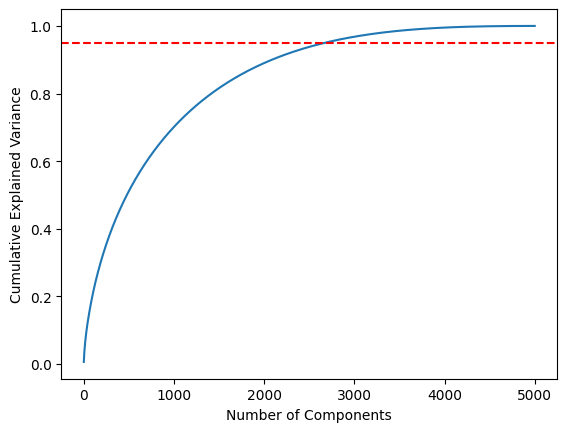

In [67]:
# Perform SVD to analyze feature importance
svd = TruncatedSVD(n_components=5000)
svd.fit(tfidf_matrix)

plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(0.95, color='red', linestyle='--')
plt.show()

Number of features for 95% explained variance: 2671


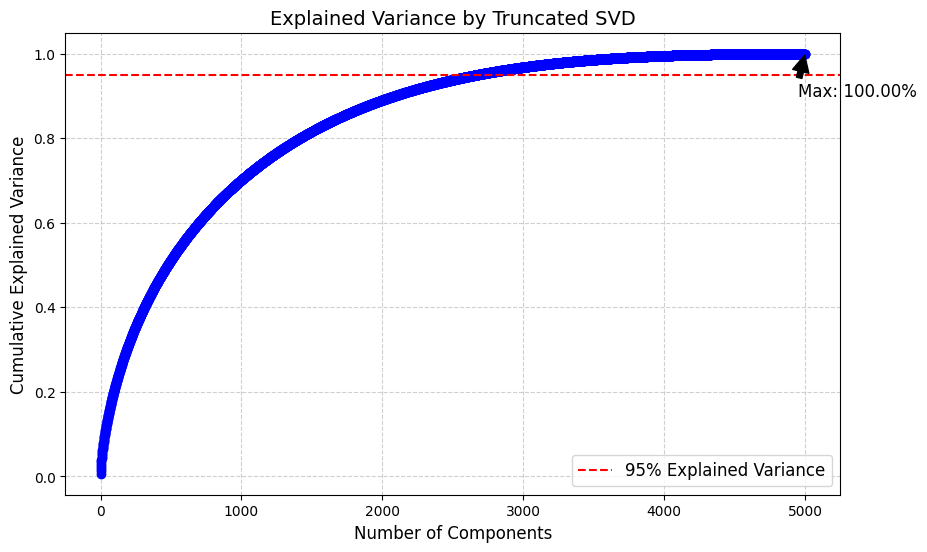

In [68]:
# Calculate cumulative explained variance
explained_variance = svd.explained_variance_ratio_.cumsum()

try:
    features_for_95 = next((i + 1 for i, v in enumerate(explained_variance) if v >= 0.95))
    print(f"Number of features for 95% explained variance: {features_for_95}")
except StopIteration:
    print("95% explained variance not reached with the current number of components.")
    print(f"Maximum explained variance: {explained_variance[-1]:.2%}")
    features_for_95 = len(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.title("Explained Variance by Truncated SVD", fontsize=14)

plt.axhline(0.95, color='red', linestyle='--', label='95% Explained Variance')
plt.legend(loc='lower right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.annotate(
    f'Max: {explained_variance[-1]:.2%}',
    xy=(len(explained_variance) - 1, explained_variance[-1]),
    xytext=(len(explained_variance) - 50, explained_variance[-1] - 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=12
)

plt.show()

In [69]:
tfidf = TfidfVectorizer(
    max_features=2671,
    min_df=5,
    ngram_range=(1, 2)
)

tfidf_matrix = tfidf.fit_transform(df['lemmas'])

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (6236, 2671)


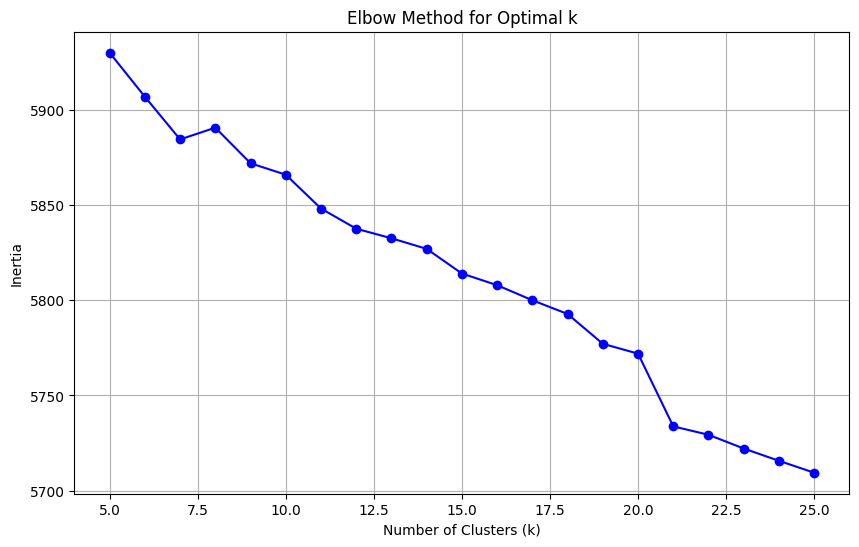

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(5, 26):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(5, 26), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [96]:
optimal_k = 21

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

print(df[['nass', 'cluster']].head())

                                                nass  cluster
0   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...       15
1   الحمد لله  هو الثناء على الله بصفات الكمال وب...        1
2  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...       20
3   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...        1
4  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...        9


In [72]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']

In [97]:
df[['sura', 'ayah', 'nass', 'cluster']].head()

sura  ayah                                               nass  cluster
0     1     1   بسم الله  أي أبتدئ بكل اسم لله تعالى لأن لفظ ...       15
1     1     2   الحمد لله  هو الثناء على الله بصفات الكمال وب...        1
2     1     3  الرحمن الرحيم اسمان دالان على أنه تعالى ذو الر...       20
3     1     4   مالك يوم الدين  المالك هو من اتصف بصفة الملك ...        1
4     1     5  وقوله  إياك نعبد وإياك نستعين  أي نخصك وحدك با...        9

In [75]:
df.to_csv("clustered_tafseer.csv", index=False, encoding="utf-8-sig")

In [76]:
df_quran = pd.read_csv("main_quran.csv")
df_quran.head()

بِسۡمِ ٱللَّهِ ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ 
0     ٱلۡحَمۡدُ لِلَّهِ رَبِّ ٱلۡعَٰلَمِينَ 
1                   ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ 
2                   مَٰلِكِ يَوۡمِ ٱلدِّينِ 
3  إِيَّاكَ نَعۡبُدُ وَإِيَّاكَ نَسۡتَعِينُ 
4        ٱهۡدِنَا ٱلصِّرَٰطَ ٱلۡمُسۡتَقِيمَ

In [77]:
df_quran = pd.read_csv("main_quran.csv")
df_quran.head()

aya_text
0    بِسۡمِ ٱللَّهِ ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ 
1     ٱلۡحَمۡدُ لِلَّهِ رَبِّ ٱلۡعَٰلَمِينَ 
2                   ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ 
3                   مَٰلِكِ يَوۡمِ ٱلدِّينِ 
4  إِيَّاكَ نَعۡبُدُ وَإِيَّاكَ نَسۡتَعِينُ

In [98]:
import pandas as pd

df_final = pd.DataFrame({
    'sura': df['sura'],
    'ayah': df['ayah'],
    'aya_text': df_quran['aya_text'],
    'cluster': df['cluster']
})

df_final.head(100)


sura  ayah                                           aya_text  cluster
0      1     1            بِسۡمِ ٱللَّهِ ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ        15
1      1     2             ٱلۡحَمۡدُ لِلَّهِ رَبِّ ٱلۡعَٰلَمِينَ         1
2      1     3                           ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ        20
3      1     4                           مَٰلِكِ يَوۡمِ ٱلدِّينِ         1
4      1     5          إِيَّاكَ نَعۡبُدُ وَإِيَّاكَ نَسۡتَعِينُ         9
..   ...   ...                                                ...      ...
95     2    89  وَلَمَّا جَآءَهُمۡ كِتَٰبٞ مِّنۡ عِندِ ٱللَّه...        6
96     2    90  بِئۡسَمَا ٱشۡتَرَوۡاْ بِهِۦٓ أَنفُسَهُمۡ أَن ي...        6
97     2    91  وَإِذَا قِيلَ لَهُمۡ ءَامِنُواْ بِمَآ أَنزَلَ...        6
98     2    92  ۞ وَلَقَدۡ جَآءَكُم مُّوسَىٰ بِٱلۡبَيِّنَٰتِ ...       18
99     2    93  وَإِذۡ أَخَذۡنَا مِيثَٰقَكُمۡ وَرَفَعۡنَا فَوۡ...        3

[100 rows x 4 columns]

In [84]:
df_final.head(5000)


sura  ayah                                          aya_text  cluster
0        1     1           بِسۡمِ ٱللَّهِ ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ         5
1        1     2            ٱلۡحَمۡدُ لِلَّهِ رَبِّ ٱلۡعَٰلَمِينَ         6
2        1     3                          ٱلرَّحۡمَٰنِ ٱلرَّحِيمِ         0
3        1     4                          مَٰلِكِ يَوۡمِ ٱلدِّينِ         6
4        1     5         إِيَّاكَ نَعۡبُدُ وَإِيَّاكَ نَسۡتَعِينُ         5
...    ...   ...                                               ...      ...
4995    56    17       يَطُوفُ عَلَيۡهِمۡ وِلۡدَٰنٞ مُّخَلَّدُونَ         0
4996    56    18  بِأَكۡوَابٖ وَأَبَارِيقَ وَكَأۡسٖ مِّن مَّعِينٖ         0
4997    56    19       لَّا يُصَدَّعُونَ عَنۡهَا وَلَا يُنزِفُونَ         0
4998    56    20               وَفَٰكِهَةٖ مِّمَّا يَتَخَيَّرُونَ         0
4999    56    21              وَلَحۡمِ طَيۡرٖ مِّمَّا يَشۡتَهُونَ         0

[5000 rows x 4 columns]

In [85]:
df.to_csv("final_kmeans.csv", index=False, encoding="utf-8-sig")

In [99]:
df_sampled = df_final.groupby('cluster', group_keys=False).apply(lambda x: x.sample(n=min(25, len(x)), random_state=42))

df_sampled


<ipython-input-99-4d1e3840beac>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_final.groupby('cluster', group_keys=False).apply(lambda x: x.sample(n=min(25, len(x)), random_state=42))


sura  ayah                                           aya_text  cluster
4204    40    72     فِي ٱلۡحَمِيمِ ثُمَّ فِي ٱلنَّارِ يُسۡجَرُونَ         0
4747    52    13   يَوۡمَ يُدَعُّونَ إِلَىٰ نَارِ جَهَنَّمَ دَعًّا         0
3030    26    99          وَمَآ أَضَلَّنَآ إِلَّا ٱلۡمُجۡرِمُونَ         0
1813    15    12  كَذَٰلِكَ نَسۡلُكُهُۥ فِي قُلُوبِ ٱلۡمُجۡرِمِينَ         0
4450    44    37  أَهُمۡ خَيۡرٌ أَمۡ قَوۡمُ تُبَّعٖ وَٱلَّذِينَ ...        0
...    ...   ...                                                ...      ...
1688    12    93  ٱذۡهَبُواْ بِقَمِيصِي هَٰذَا فَأَلۡقُوهُ عَلَى...       20
6231   114     2                                   مَلِكِ ٱلنَّاسِ        20
2630    22    36  وَٱلۡبُدۡنَ جَعَلۡنَٰهَا لَكُم مِّن شَعَٰٓئِرِ...       20
240      2   234  وَٱلَّذِينَ يُتَوَفَّوۡنَ مِنكُمۡ وَيَذَرُونَ ...       20
3316    28    65  وَيَوۡمَ يُنَادِيهِمۡ فَيَقُولُ مَاذَآ أَجَبۡ...       20

[525 rows x 4 columns]